# 파이썬에서 엑셀 다루기

In [1]:
!pip install pandas

In [2]:
!pip install xlrd

In [3]:
!pip install xlwt

In [4]:
!pip install xlsxwriter

In [5]:
!pip install matplotlib

In [6]:
!pip list

Package                Version
---------------------- -----------
absl-py                0.9.0
argcomplete            1.10.0
astroid                2.4.2
astunparse             1.6.3
atomicwrites           1.4.0
attrs                  19.3.0
backcall               0.1.0
beautifulsoup4         4.6.0
bleach                 3.1.5
boto                   2.49.0
boto3                  1.14.20
botocore               1.17.20
branca                 0.4.1
bs4                    0.0.1
cachetools             4.1.0
certifi                2020.4.5.1
chardet                3.0.4
click                  7.1.2
colorama               0.4.3
cycler                 0.10.0
Cython                 0.29.14
decorator              4.4.2
defusedxml             0.6.0
docutils               0.15.2
docx2txt               0.8
EbookLib               0.17.1
entrypoints            0.3
extract-msg            0.23.1
folium                 0.11.0
gast                   0.3.3
gensim                 3.8.3
get                 

# 엑셀파일 호출하기

파일을 호출할 때 옵션이 생략되어 있으며, 기본옵션이 적용되고 있다.

옵션 1> sheet_name = '시트이름' or 시트인덱스번호

옵션 2> index_col = '열이름' or 열인덱스번호

In [11]:
import pandas as pd

df = pd.read_excel('./0718/엑셀/학생시험성적.xlsx')
df

,학생,국어,영어,수학
0,강유라,80,90,100
1,김진수,80,90,100
2,김진형,80,90,100
3,남도인,80,90,100
4,이선아,80,90,100
5,조예진,80,90,100
6,차승현,80,90,100
7,최인식,80,90,100
8,황정우,80,90,100
9,황호준,80,90,100


In [12]:
import pandas as pd

df = pd.read_excel('./0718/엑셀/학생시험성적.xlsx', sheet_name=1)
df

,학생,파이썬,자바,C#
0,강유라,80,90,100
1,김진수,80,90,100
2,김진형,80,90,100
3,남도인,80,90,100
4,이선아,80,90,100
5,조예진,80,90,100
6,차승현,80,90,100
7,최인식,80,90,100
8,황정우,80,90,100
9,황호준,80,90,100


# 엑셀에 데이터 작성하기

### 엑셀에 데이터를 작성하는 3단계

1) pandas의 ExcelWriter 객체 생성

2) pandas의 DataFrame을 이용하여 지정된 Sheet에 데이터 작성하기

3) pandas의 ExcelWriter 객체를 닫아준다 (저장 후 종료 선언)

In [24]:
# 1) pandas의 ExcelWriter 객체 생성

import pandas as pd

excel_exam_data1 = {
    '학생': ['일동이','이동이','삼동이','사동이','오동이'],
    '국어': [80, 90, 100, 90, 80],
    '영어': [80, 90, 100, 90, 80],
    '수학': [80, 90, 100, 90, 80],}

In [25]:
# 2) pandas의 DataFrame을 이용하여 지정된 Sheet에 데이터 작성하기

df1 = pd.DataFrame(excel_exam_data1, columns=['학생','국어','영어','수학'])
df1

,학생,국어,영어,수학
0,일동이,80,80,80
1,이동이,90,90,90
2,삼동이,100,100,100
3,사동이,90,90,90
4,오동이,80,80,80


In [26]:
# 3) pandas의 ExcelWriter 객체를 닫아준다 (저장 후 종료 선언)

excel_writer = pd.ExcelWriter('./0718/엑셀/학생시험성적2.xlsx', engine='xlsxwriter')

# index 값을 생략하면 기본값으로 True 작동한다. (라인번호가 A열에 추가된다)
df1.to_excel(excel_writer, index=False)

excel_writer.save()

In [27]:
import pandas as pd

df100 = pd.read_excel('./0718/엑셀/학생시험성적2.xlsx')
df100

,학생,국어,영어,수학
0,일동이,80,80,80
1,이동이,90,90,90
2,삼동이,100,100,100
3,사동이,90,90,90
4,오동이,80,80,80


In [28]:
import pandas as pd

excel_exam_data1 = {
    '작품': ['아저씨','타짜','비긴어게인','인턴','쇼생크탈출'],
    'OST': ['노래1','노래2','노래3','노래4','노래5'],
    '연출': ['연출1','연출2','연출3','연출4','연출5'],
    '배우': ['배우1','배우2','배우3','배우4','배우5'],}

df2 = pd.DataFrame(excel_exam_data1, columns=['작품','OST','연출','배우'])

excel_writer = pd.ExcelWriter('./0718/엑셀/영화정보.xlsx', engine='xlsxwriter')

df2.to_excel(excel_writer, index=False)

excel_writer.save()

In [29]:
import pandas as pd

df100 = pd.read_excel('./0718/엑셀/영화정보.xlsx')
df100

,작품,OST,연출,배우
0,아저씨,노래1,연출1,배우1
1,타짜,노래2,연출2,배우2
2,비긴어게인,노래3,연출3,배우3
3,인턴,노래4,연출4,배우4
4,쇼생크탈출,노래5,연출5,배우5


# 하나의 엑셀파일에 두개의 데이터 삽입

In [35]:
excel_writer = pd.ExcelWriter('./0718/엑셀/두시트합치기.xlsx', engine='xlsxwriter')

# index 값을 생략하면 기본값으로 True 작동한다. (라인번호가 A열에 추가된다)
df1.to_excel(excel_writer, index=False, sheet_name='성적')
df2.to_excel(excel_writer, index=False, sheet_name='영화')

excel_writer.save()

df200 = pd.read_excel('./0718/엑셀/두시트합치기.xlsx', sheet_name=0)
df201 = pd.read_excel('./0718/엑셀/두시트합치기.xlsx', sheet_name=1)
display(df200)
display(df201)

,학생,국어,영어,수학
0,일동이,80,80,80
1,이동이,90,90,90
2,삼동이,100,100,100
3,사동이,90,90,90
4,오동이,80,80,80


,작품,OST,연출,배우
0,아저씨,노래1,연출1,배우1
1,타짜,노래2,연출2,배우2
2,비긴어게인,노래3,연출3,배우3
3,인턴,노래4,연출4,배우4
4,쇼생크탈출,노래5,연출5,배우5


# 엑셀파일 통합

In [40]:
import pandas as pd

excel_data_files = ['./0718/엑셀/담당자별_판매량_Andy사원.xlsx',
                    './0718/엑셀/담당자별_판매량_Becky사원.xlsx',
                    './0718/엑셀/담당자별_판매량_Chris사원.xlsx']

# 엑셀파일 통합을 위한 데이터가 없는 변수 생성
total_data = pd.DataFrame()

# 엑셀파일의 데이터를 변수에 저장
# 사용 중이던 인덱스번호까지 가져오므로 인덱스는 무시한다.
for f in excel_data_files:
    df = pd.read_excel(f)
    total_data = total_data.append(df, ignore_index=True)

total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


# 만약, 엑셀파일이 100개라면?

# glob 모듈을 이용하여 한번에 파일 처리

In [41]:
from glob import glob

glob('./0718/엑셀/담당자*.xlsx')

['./0718/엑셀\\담당자별_판매량_Andy사원.xlsx',
 './0718/엑셀\\담당자별_판매량_Becky사원.xlsx',
 './0718/엑셀\\담당자별_판매량_Chris사원.xlsx']

In [1]:
import pandas as pd
from glob import glob

excel_data_file1 = glob('./0718/엑셀/담당자*.xlsx')

# 엑셀파일 통합을 위한 데이터가 없는 변수 생성
total_data1 = pd.DataFrame()

# 엑셀파일의 데이터를 변수에 저장
# 사용 중이던 인덱스번호까지 가져오므로 인덱스는 무시한다.
for f in excel_data_file1:
    df = pd.read_excel(f)
    total_data1 = total_data1.append(df, ignore_index=True)
    
# 담당자별_판매량_통합.xlsx
excel_file_name = '담당자별_판매량_통합.xlsx'
excel_total_file_writer = pd.ExcelWriter('./0718/엑셀/'+excel_file_name, engine='xlsxwriter')

total_data1.to_excel(excel_total_file_writer, index=False, sheet_name='판매량통합')
excel_total_file_writer.save()

[]

# 데이터를 추가하고 변경하기

* 변수.loc[index_name, column_name]

* 변수.iloc[행시작:행끝, 열시작:열끝]

In [2]:
import pandas as pd

df = pd.read_excel('./0718/엑셀/담당자별_판매량_Andy사원.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331


In [3]:
df[['제품명','1분기','2분기','3분기','4분기']]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331


In [5]:
df.loc[2,'4분기'] = 777
df.loc[1,'3분기'] = 444
df.loc[0,'2분기'] = 222
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,222,120,137
1,구두,A,가,273,241,444,217
2,핸드백,A,가,385,316,355,777


In [8]:
df.loc[3, '제품명'] = '애플워치'
df.loc[3, '담당자'] = 'A'
df.loc[3, '지역'] = '가'
df.loc[3, '1분기'] = 238
df.loc[3, '2분기'] = 179
df.loc[3, '3분기'] = 425
df.loc[3, '4분기'] = 362
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198.0,222.0,120.0,137.0
1,구두,A,가,273.0,241.0,444.0,217.0
2,핸드백,A,가,385.0,316.0,355.0,777.0
3,애플워치,A,가,238.0,179.0,425.0,362.0


In [9]:
df['지역'] = '강남구'
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,강남구,198.0,222.0,120.0,137.0
1,구두,A,강남구,273.0,241.0,444.0,217.0
2,핸드백,A,강남구,385.0,316.0,355.0,777.0
3,애플워치,A,강남구,238.0,179.0,425.0,362.0


In [10]:
df['담당자'] = '안재덕'
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,안재덕,강남구,198.0,222.0,120.0,137.0
1,구두,안재덕,강남구,273.0,241.0,444.0,217.0
2,핸드백,안재덕,강남구,385.0,316.0,355.0,777.0
3,애플워치,안재덕,강남구,238.0,179.0,425.0,362.0


In [16]:
excel_file = pd.ExcelWriter('./0718/엑셀/담당자별_판매량_Andy사원3.xlsx', engine='xlsxwriter')

df.to_excel(excel_file, index=False)

excel_file.save()

# 정규 표현식: re

In [17]:
import re

file_name = './0718/엑셀/담당자별_판매량_Andy사원.xlsx'

new_file_name = re.sub('.xlsx', '2.xlsx', file_name)
new_file_name

'./0718/엑셀/담당자별_판매량_Andy사원2.xlsx'

In [18]:
from glob import glob
import re
import pandas as pd

excel_data_file1 = glob('./0718/엑셀/담당자별_판매량_*사원.xlsx')

for i in excel_data_file1:
    df = pd.read_excel(i)
    
    if (df.loc[1,'담당자'] == 'A'):
        df['담당자'] = '현빈'
    elif (df.loc[1,'담당자'] == 'B'):
        df['담당자'] = '박보검'
    elif (df.loc[1,'담당자'] == 'C'):
        df['담당자'] = '임시완'
        
    i_new = re.sub('.xlsx', '2.xlsx', i)
    print(i_new)
    
    new_excel_file = pd.ExcelWriter(i_new, engine='xlsxwriter')
    df.to_excel(new_excel_file, index=False)
    new_excel_file.save()

./0718/엑셀\담당자별_판매량_Andy사원2.xlsx
./0718/엑셀\담당자별_판매량_Becky사원2.xlsx
./0718/엑셀\담당자별_판매량_Chris사원2.xlsx


# 담당자별_판매량_통합.xlsx 에서 조건에 맞는 데이터 출력

In [19]:
import pandas as pd

df = pd.read_excel('./0718/엑셀/담당자별_판매량_통합.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [20]:
df['제품명']

0     시계
1     구두
2    핸드백
3     시계
4     구두
5    핸드백
6     시계
7     구두
8    핸드백
Name: 제품명, dtype: object

In [21]:
df['제품명'] == '핸드백'

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: 제품명, dtype: bool

In [23]:
df[df['제품명'] == '핸드백']

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


In [24]:
import pandas as pd

df = pd.read_excel('./0718/엑셀/담당자별_판매량_통합.xlsx')

handbag = df[df['제품명'] == '핸드백']

handbag

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


In [30]:
# 제품명이 구두, 제품명이 시계  | = or  & = and
df[(df['제품명'] == '구두') | (df['제품명'] == '시계')]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292


In [34]:
# 제품명이 구두이고 4분기가 200 이상
df[(df['제품명'] == '구두') & (df['4분기'] >= 200)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
4,구두,B,나,200,223,213,202
7,구두,C,다,231,279,277,292


# 그래프를 만들어 엑셀에 삽입하기

* 1) pandas의 ExcelWriter 객체를 생성
* 2) DataFrame 선언
* 3) ExcelWriter 객체로 엑셀파일 생성하기
* 4) 워크시트에 차트가 들어갈 위치 지정
* 5) ExcelWriter 객체 닫고 저장하기

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

sales = {'시간' :[9,10,11,12,13,14,15],
         '제품1':[15,14,13,12,11,10,9],
         '제품2':[12,13,14,10,9,11,15]}

df = pd.DataFrame(sales, index=sales['시간'], columns=['제품1','제품2'])
df.index.name = '시간'
df

,제품1,제품2
시간,,
9,15,12
10,14,13
11,13,14
12,12,10
13,11,9
14,10,11
15,9,15


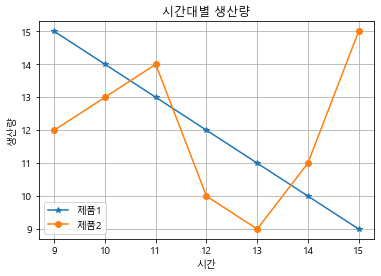

In [38]:
# sample 차트 출력
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

product_plot = df.plot(grid=True, style=['-*', '-o'], title='시간대별 생산량')
product_plot.set_ylabel('생산량')

image_file = './0718/엑셀/fig_for_excel1.png'
plt.savefig(image_file, dpi=400)
plt.show()

In [39]:
# 1) pandas의 ExcelWriter 객체 생성
excel_chart = pd.ExcelWriter('./0718/엑셀/data_chart.xlsx', engine='xlsxwriter')

# 2) DataFrame으로 데이터 삽입
df.to_excel(excel_chart, index=False, sheet_name='Chart')

# 3) ExcelWriter 객체로 엑셀파일과 워크시트 생성
workbook = excel_chart.book
worksheet = excel_chart.sheets['Chart']

# 4) 원하는 차트 종류 생성
chart = workbook.add_chart({'type':'line'})

# 5) 차트 생성을 위한 데이터 값의 범위 지정
chart.add_series({'values':'=Chart$B$2:$B$8'})
chart.add_series({'values':'=Chart$C$2:$C$8'})

# 6) 워크시트에 차트가 들어갈 위치 지정
worksheet.insert_chart('H2', chart)

# 7) 엑셀 객체를 닫고 저장
excel_chart.save()